Goal:
Taking the Fashion MNIST dataset as input, adding noise to it, and generating clean, denoised images with the help of an autoencoder

-Rahul Sethi

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
# check out the shape of the training data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


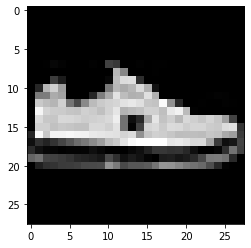

In [4]:
# Data visualisation step - let's view a random image
i = random.randint(1, 60000)
plt.imshow(X_train[i], cmap = 'gray')

In [5]:
label = y_train[i]
label


7

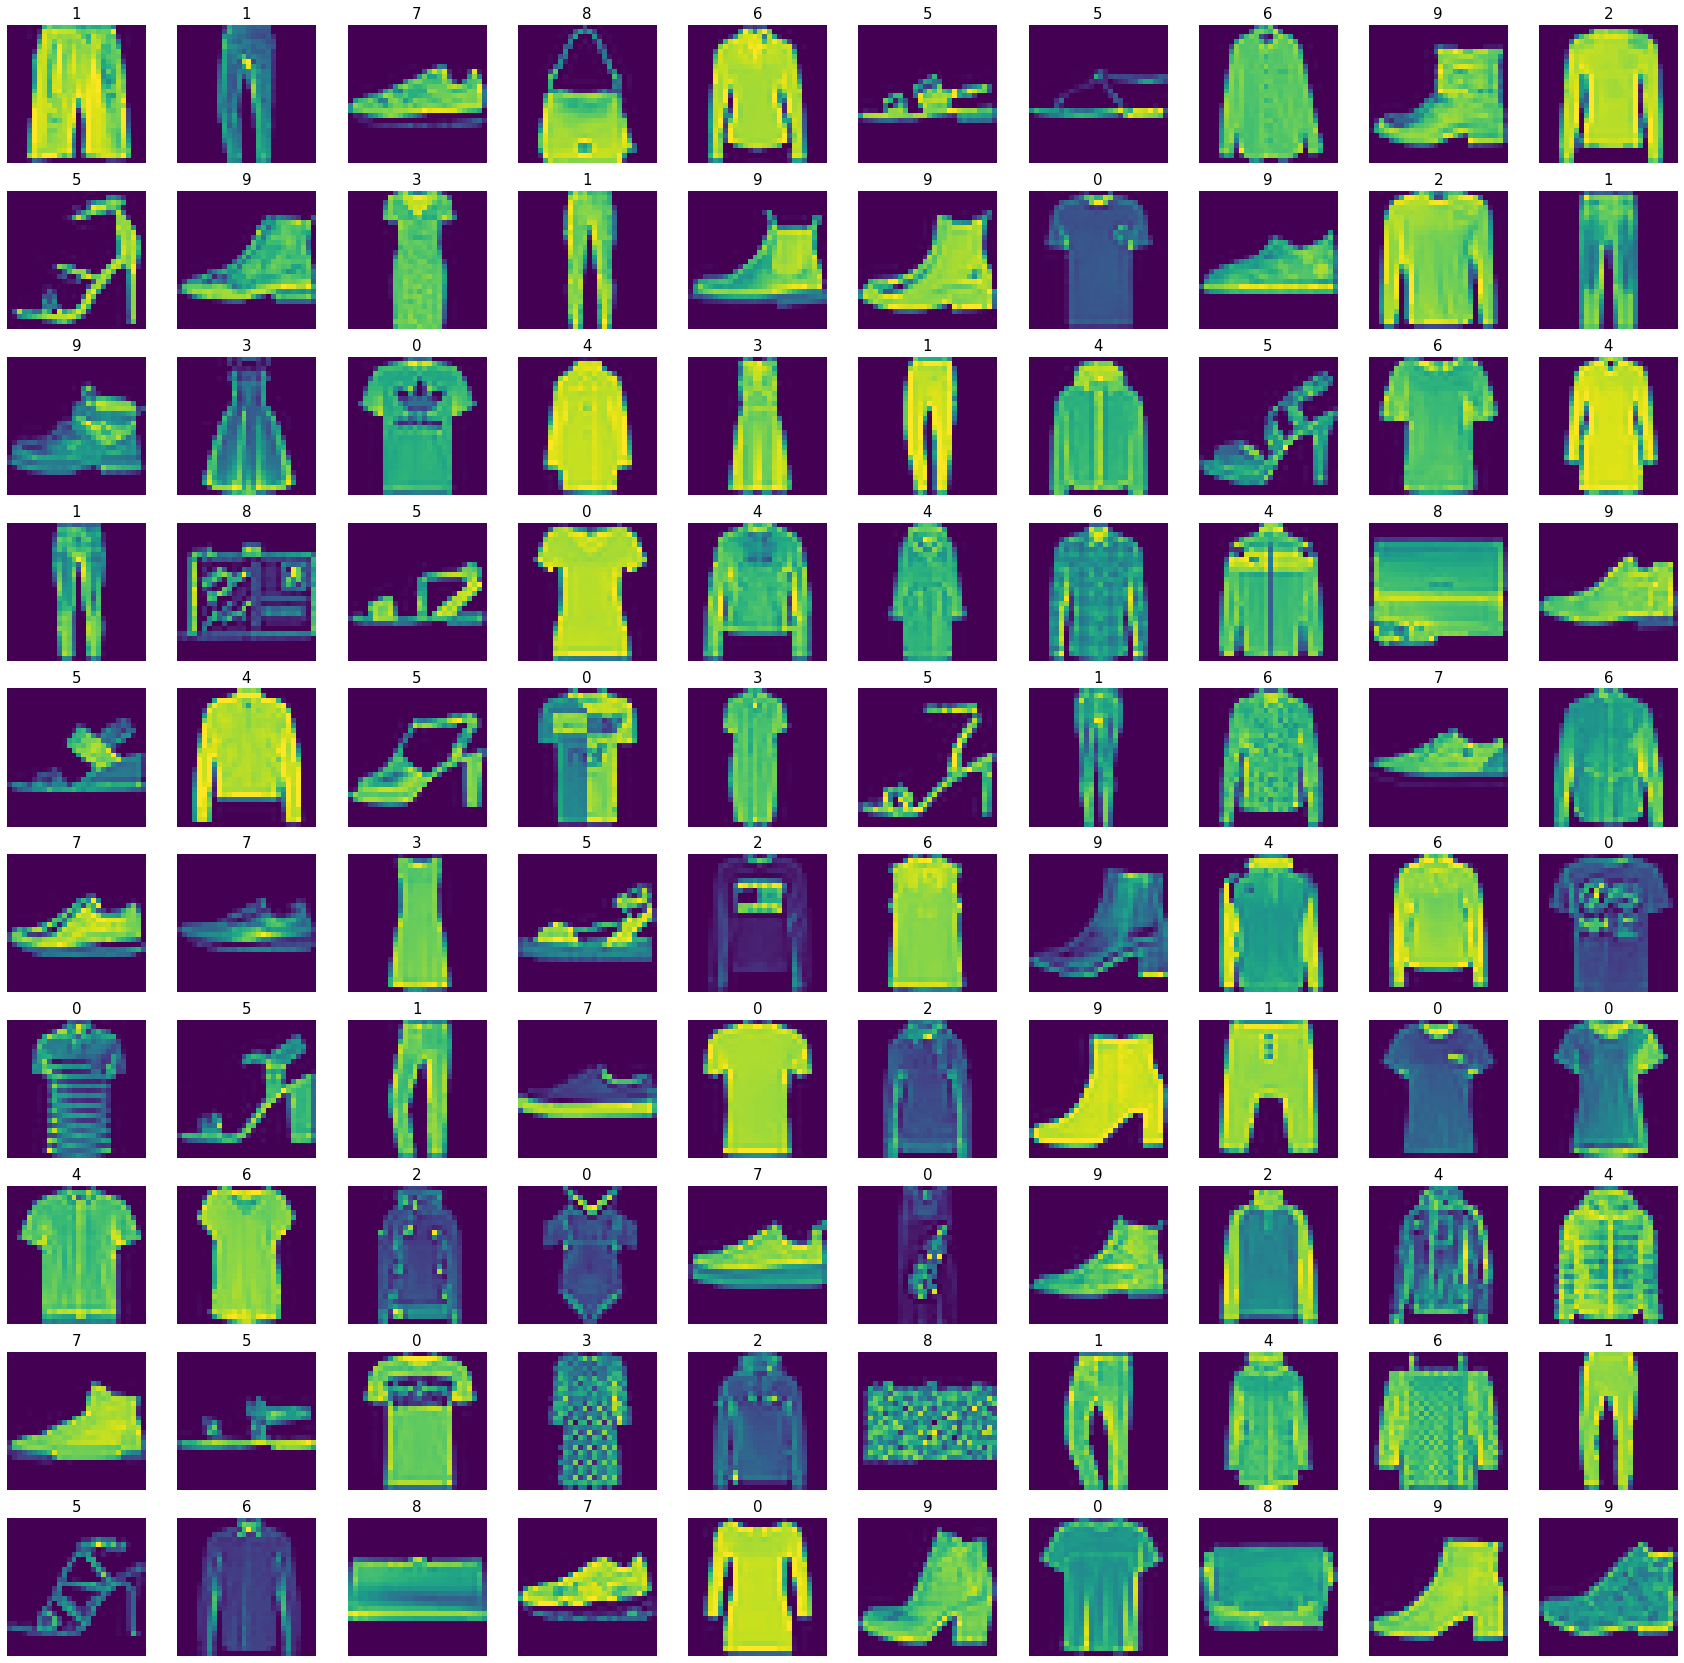

In [6]:
width = 10
length = 10

fig, axes = plt.subplots(length, width, figsize = (30,30))

axes = axes.ravel() # flatten the 15 x 15 matrix into 225 array

num_train = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, width*length):
    index  = np.random.randint(0, num_train)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')


Noise Addition -

In [7]:
# normalize data
X_train  = X_train/255
X_test = X_test/255

In [8]:
# add noise
noise_factor = 0.3
noise_dataset = []
for img in X_train:
    noisy_img = img + noise_factor*np.random.randn(*img.shape)
    noisy_img = np.clip(noisy_img, 0,1) #clipped to interval size
    noise_dataset.append(noisy_img)

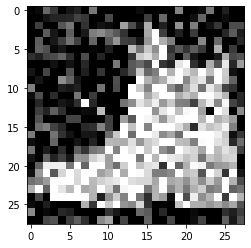

In [9]:
plt.imshow(noise_dataset[np.random.randint(0,num_train)], cmap = 'gray') #with noise

In [10]:
# add noise to test set too
noise_factor = 0.05
noise_dataset_test= []
for img in X_test:
    noisy_img = img + noise_factor*np.random.randn(*img.shape)
    noisy_img = np.clip(noisy_img, 0,1) #clipped to interval size
    noise_dataset_test.append(noisy_img)

In [11]:
#typecast to nd array
noise_dataset = np.array(noise_dataset)
noise_dataset_test = np.array(noise_dataset_test)
print(noise_dataset.shape)
print(noise_dataset_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [12]:
autoencoder = tf.keras.models.Sequential()
#encoder
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides = 2, padding = 'same',input_shape = (28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 2, padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 1, padding = 'same'))
#decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = 3, strides = 2, padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = 3, activation = 'sigmoid', strides = 2, padding = 'same'))

In [13]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [14]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
               X_train.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (noise_dataset_test.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))
#input - noise_dataset
#target - X_train

Epoch 1/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3972 - val_loss: 0.3134
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3148 - val_loss: 0.3008
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3079 - val_loss: 0.2951
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3047 - val_loss: 0.2923
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3031 - val_loss: 0.2885
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3020 - val_loss: 0.2875
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3014 - val_loss: 0.2880
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3008 - val_loss: 0.2878
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3004 - val_loss: 0.2869
Epoch 10/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3001 - val_loss: 0.2865

In [15]:
evaluation = autoencoder.evaluate(noise_dataset_test.reshape(-1,28,28,1), X_test.reshape(-1,28,28,1))
print('test loss: {:.5f}'.format(evaluation))

313/313 [==============================] - 1s 2ms/step - loss: 0.2865
test loss: 0.28650


In [16]:
prediction = autoencoder.predict(noise_dataset_test[:10].reshape(-1,28,28,1))
prediction.shape


(10, 28, 28, 1)

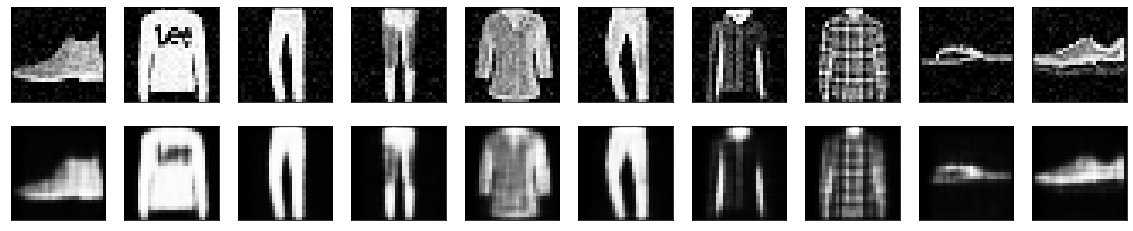

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_dataset_test[:10], prediction], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(0)
        ax.get_yaxis().set_visible(0)